In [ ]:
# Importing
import theano.tensor as T
import theano
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

#%matplotlib inline
%matplotlib inline

In [ ]:
"""
2 Horizontal layers with drift oen
"""
# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([0, 10, 0, 10, -10, 0], [50, 50, 50],
                             path_f="./GeoModeller/test_a/test_a_Foliations.csv",
                             path_i="./GeoModeller/test_a/test_a_Points.csv")

data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float64",
                                     verbose=['solve_kriging',
                                             'matrices_shapes'])
# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
# Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[3])

# Compile the theano function.
compiled_f = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(),
                             allow_input_downcast=True, profile=True)
sol = compiled_f(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3], input_data_P[4],
                 input_data_P[5])

real_sol = np.load('test_a_sol.npy')

np.testing.assert_array_almost_equal(sol, real_sol)

GeMpy.plot_section(geo_data, 25, block=sol[0, 0, :], direction='y', plot_data=True)
GeMpy.plot_potential_field(geo_data, sol[0, 1, :], 25)

I am here
[2, 2]
[3]


In [ ]:
# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([0,10,0,10,-10, 0],[ 50, 50, 50],
                         path_f = "./GeoModeller/test_c/test_c_Foliations.csv",
                         path_i = "./GeoModeller/test_c/test_c_Points.csv")

In [ ]:
rescaled_data = GeMpy.rescale_data(geo_data)

In [ ]:
data_interp.interpolator._data_scaled = rescaled_data
data_interp.interpolator.order_table()
data_interp.interpolator.set_theano_shared_parameteres()

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
#Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[0]) 

In [8]:
compiled_f(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3], input_data_P[4],
                 input_data_P[5])

length_of_C __str__ = 5
length_of_CG __str__ = 3
length_of_CGI __str__ = 2
length_of_U_I __str__ = 0
Dual Kriging parameters __str__ = [ 0.000001 -0.        2.912621  0.000002  0.      ]


array([[[ 2.      ,  2.      ,  2.      , ...,  2.      ,  2.      ,  2.      ],
        [-0.165796, -0.164517, -0.162708, ...,  0.166041,  0.167894,  0.169208]]])

[2, 2]
[0]


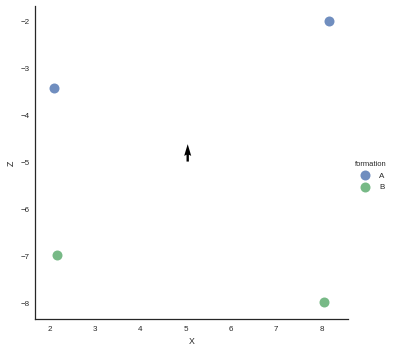

In [10]:


data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float64",
                                     verbose=['solve_kriging',
                                             'matrices_shapes'])

GeMpy.plot_data(geo_data)

# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
#Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[0]) 

In [12]:
data_interp.interpolator.tg.a_T.set_value(55)

In [15]:
data_interp.interpolator.__dict__, data_interp.interpolator.tg.__dict__

({'_data_scaled': <DataManagement.DataManagement at 0x7f82213717b8>,
  '_grid_scaled': <DataManagement.DataManagement.GridClass at 0x7f81f25861d0>,
  'dtype': 'float64',
  'tg': <theanograf.TheanoGraph_pro at 0x7f81f25d0668>},
 {'a_T': Range,
  'azimuth': Subtensor{int64:int64:}.0,
  'azimuth_all': Azimuth,
  'c_o_T': Covariance at 0,
  'compute_pf': True,
  'dip_angles': Subtensor{int64:int64:}.0,
  'dip_angles_all': Angle of every dip,
  'dips_position': Subtensor{int64:int64:, ::}.0,
  'dips_position_all': Position of the dips,
  'dips_position_tiled': Reshape{2}.0,
  'fault_matrix': Alloc.0,
  'final_block': final block init,
  'gi_reescale': <TensorType(float64, scalar)>,
  'grid_val_T': Coordinates of the grid points to interpolate,
  'i_reescale': <TensorType(float64, scalar)>,
  'len_series_f': Length of foliations in every series,
  'len_series_i': Length of interfaces in every series,
  'n_dimensions': 3,
  'n_formation': Value of the formation,
  'n_formation_op': Subtensor{

In [13]:
compiled_f(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3], input_data_P[4],
                 input_data_P[5])


drift degree __str__ = [3]
length_of_C __str__ = 8
range __str__ = 1.4433756729740645
length_of_CG __str__ = 3
length_of_CGI __str__ = 2
length_of_U_I __str__ = 3
Dual Kriging parameters __str__ = [ 0.322024  0.        1.048662  2.689936 -2.448015 -0.043649  0.        0.793738]


array([[[ 0.      ,  0.      ,  0.      , ...,  1.      ,  1.      ,  1.      ],
        [ 0.011002,  0.039346,  0.068023, ...,  1.244429,  1.269424,  1.294634]]])

In [7]:
f(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

drift degree __str__ = [3]
length_of_C __str__ = 8
range __str__ = 1.4433756729740645
length_of_CG __str__ = 3
length_of_CGI __str__ = 2
length_of_U_I __str__ = 3
Dual Kriging parameters __str__ = [ 0.322024  0.        1.048662  2.689936 -2.448015 -0.043649  0.        0.793738]


array([[[ 0.      ,  0.      ,  0.      , ...,  1.      ,  1.      ,  1.      ],
        [ 0.011002,  0.039346,  0.068023, ...,  1.244429,  1.269424,  1.294634]]])

In [5]:
data_interp.interpolator.tg.u_grade_T.get_value()

array([0])

In [8]:
# Compile the theano function.
compiled_f2 = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(),
                            #on_unused_input='ignore',
                           allow_input_downcast=True, profile=True)


sol2 = compiled_f2(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

drift degree __str__ = [0]
range __str__ = 1.425664641137217
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
length_of_U_I __str__ = 0
len

In [49]:
0.322024  0.        1.048662  2.689936 -2.448015 -0.043649  0.        0.793738]

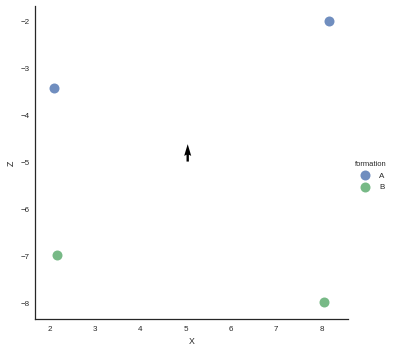

In [60]:
# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([0,10,0,10,-10, 0],[ 50, 50, 50],
                         path_f = "./GeoModeller/test_b/test_b_Foliations.csv",
                        path_i = "./GeoModeller/test_b/test_b_Points.csv")

data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float64",
                                     verbose=['solve_kriging'])

In [61]:
# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
#Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[3]) 

# Compile the theano function.
compiled_f3 = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(),
                            #on_unused_input='ignore',
                            allow_input_downcast=True, profile=True)



In [62]:
sol3 = compiled_f3(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Dual Kriging parameters __str__ = [ 0.318122  0.        1.039766  2.666622 -2.427945 -0.043572  0.        0.793337]
